In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv('Advertising.csv')

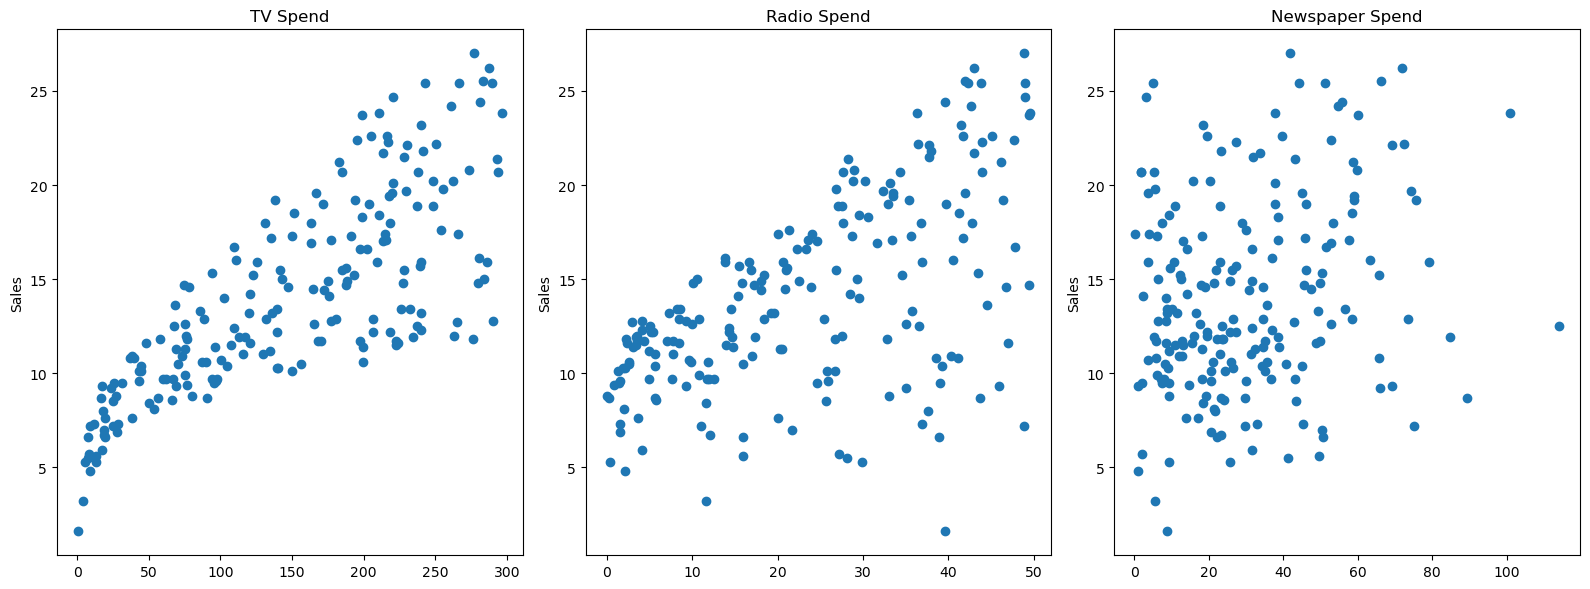

In [3]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [4]:
X = df.drop('sales',axis=1)
y = df['sales']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = LinearRegression()

In [8]:
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test,y_pred)

In [12]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Percentage Error: {mape}")

Mean Absolute Error: 1.5116692224549084
Mean Squared Error: 3.79679723671522
Root Mean Squared Error: 1.9485372043446387
Mean Absolute Percentage Error: 0.1629872011815834


In [13]:
test_residuals = y_test - y_pred

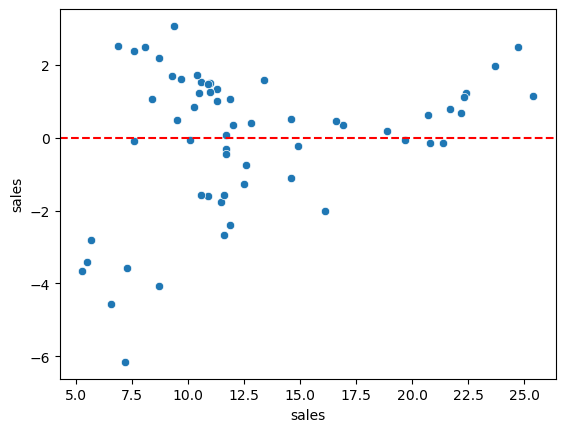

In [15]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red',ls='--');

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


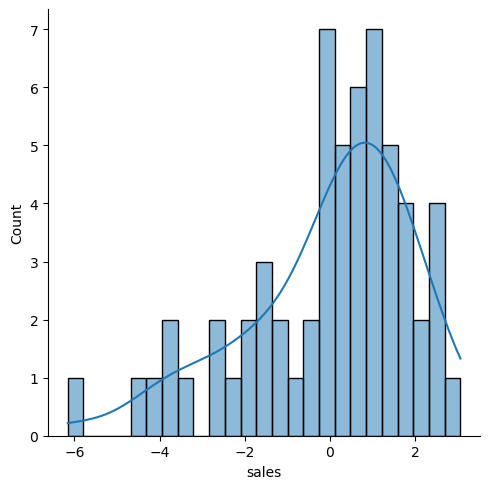

In [16]:
sns.displot(test_residuals,bins=25,kde=True);

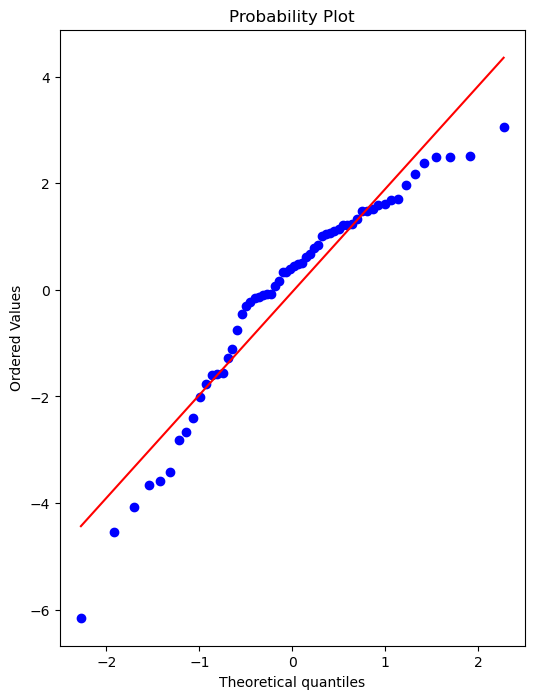

In [18]:
fig,axes = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(test_residuals,plot=axes)

In [19]:
final_model = LinearRegression()

In [20]:
final_model.fit(X,y)

LinearRegression()

In [21]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [22]:
y_pred_f = final_model.predict(X)

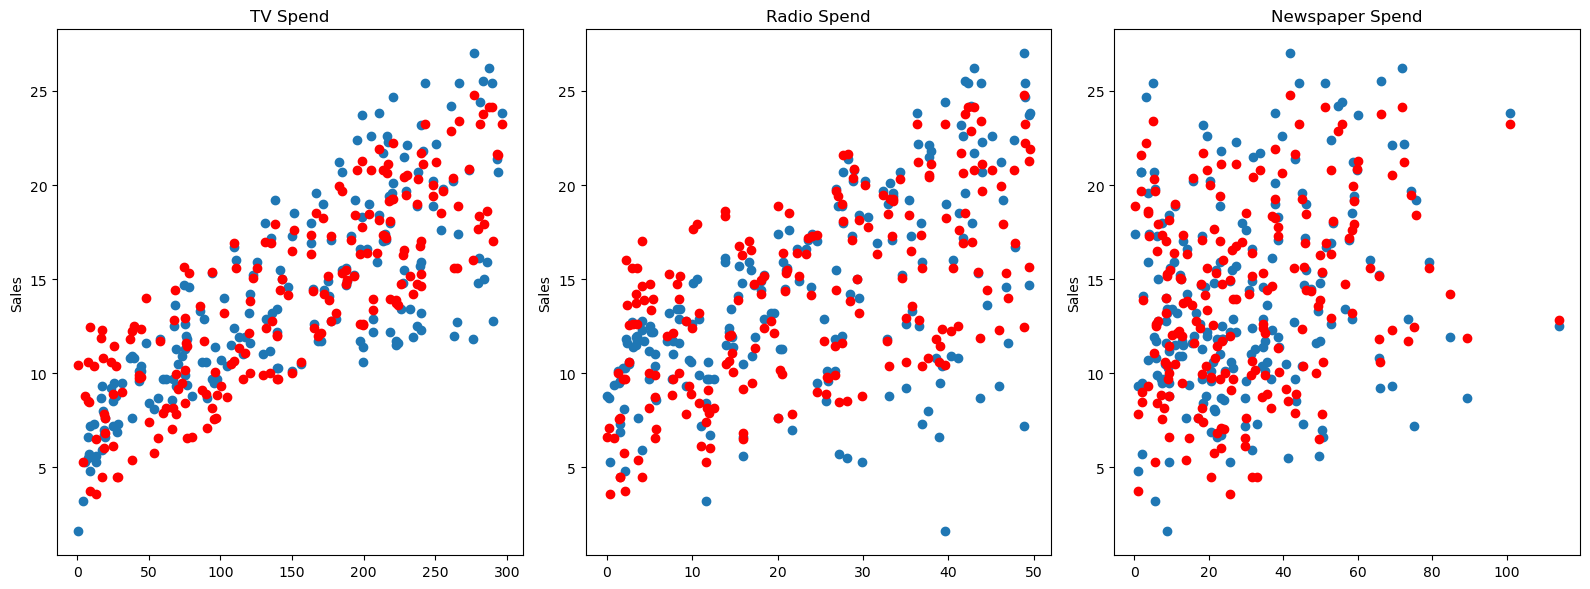

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_pred_f,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_pred_f,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_pred_f,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [25]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [26]:
loaded_model = load('final_sales_model.joblib')

In [27]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])